# Pythonによる画像処理演習2

## 到達目標
- Python+openCV環境で簡単な画像処理プログラムを作成できる

# EX4
## ガウシアンフィルタ
### 以下のコードを完成してグレースケール画像に変換後，ガウシアン フィルタを掛けた画像を表示してみよう．
- グレースケール化の⽅法については前回を参照

- 画像の周囲1pixelは計算せず0を⼊れること 
- 今回は画像処理プログラミング練習が⽬的なので，次のフィルタ関数 『cv2.filter2D() / cv2.GaussianBlur() / cv2.Sobel() / np.convolve() 』は利 ⽤しないこと
- 下表のガウシアンフィルタのフィルタ係数(3x3)を利⽤すること


|      フィルタ係数   |
| ---- | 

|   |   |   |
| ---- | ---- | ---- |
|  1/16  |  2/16  | 1/16 |
|  2/16  |  4/16  | 2/16 |
|  1/16  |  2/16  | 1/16 | 


In [121]:
#Ex4
#ガウシアンフィルタ

import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [122]:
#入出力ファイル名指定
fname_in  = "./img_Ex1_in.jpg"


In [123]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
img = cv2.resize(img,(int(img.shape[1]*0.2),int(img.shape[0]*0.2)))
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [124]:

#出力画像を準備(float型)
img_gray = np.zeros( (H,W), float )
img_out = np.zeros( (H,W), float )


#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.
        

#わかりやすくするためにごま塩ノイズを与える
noise_x = np.random.randint(0, W-1 , 1000) #0から(W-1)までの乱数を千個作る
noise_y = np.random.randint(0, H-1 , 1000)
img_gray[(noise_y,noise_x)] = 255 

In [125]:
#ガウシアン フィルタ処理
#ここを編集　配列coeffの??を修正して正しいフィルタ係数を設定する
coeff = (
    [1/16,2/16,1/16],
    [2/16,4/16,2/16],
    [1/16,2/16,1/16]
)
for y in range(1, H-1, 1) :#yは1～H-2
    for x in range(1, W-1, 1) :#xは1～W-2
        sum = 0.
        for iy in range(0, 3, 1) : #iyは0,1,2
            for ix in range(0, 3, 1) : #ixは0,1,2
                #ここを編集 変数sumに周辺画素とcoeffの畳み込み演算をして格納
                sum = sum + coeff[iy][ix]*img_gray[y+iy-1,x+ix-1]
        img_out[y,x] = sum                      
  
   

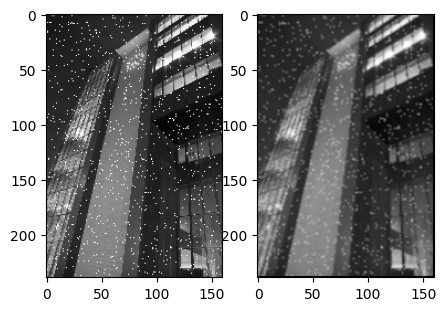

In [126]:
#display img
img = img[:, :, ::-1]  #BGR->RGB変換
plt.figure(figsize=(5, 5),dpi=100)                        #高解像度表示設定
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img_gray))       #元画像グレースケール貼り付け
plt.gray()                                                 #グレースケール表示
plt.subplot(1, 2, 2), plt.imshow(np.uint8(img_out))        #フィルタ画像貼り付け
plt.show()       

# EX5
## ソーベルフィルタ
### 以下のコードを完成してグレースケール画像に変換後，横ソーベルフィ ルタを掛けた画像を表示してみよう．
- グレースケール化の⽅法についてはひな形を参照
- 次の図のソーベルフィルタのフィルタ係数(3x3)を利⽤すること
![フィルタ係数](./figs/fig.Ex2_5.png "ガウスフィルタ")
- 画像の周囲1pixelは計算せず0を⼊れること 
- フィルタ適⽤後，負値となる画素は -1 倍して正値に変換すること 
- フィルタ適⽤後，値が255を超える画素には255を代⼊すること 
- 今回は画像処理プログラミング練習が⽬的なので，次のフィルタ関数 『cv2.filter2D() / cv2.GaussianBlur() / cv2.Sobel() / np.convolve() 』は利 ⽤しないこと
- 下表の横ソーベルフィルタのフィルタ係数(3x3)を利⽤すること


|      フィルタ係数   |
| ---- | 

|   |   |   |
| ---- | ---- | ---- |
|  -1  |  0  | 1 |
|  -2  |  0  | 2 |
|  -1  |  0  | 1 | 


In [127]:
#Ex5
#ソーベルフィルタ

import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [128]:
#入出力ファイル名指定
fname_in  = "./img_Ex1_in.jpg"

In [129]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
img = cv2.resize(img , (int(img.shape[1]*0.2), int(img.shape[0]*0.2)))
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [130]:
#出力画像を準備(float型)
img_gray = np.zeros( (H,W), float )
img_out = np.zeros( (H,W), float )


In [131]:
#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.

In [132]:
#ソーベルフィルタ処理
#ここを編集　配列coeffの??を修正して正しいフィルタ係数を設定する
coeff = (
    [1/16,2/16,1/16],
    [2/16,4/16,2/16],
    [1/16,2/16,1/16]
)
#print(coef)

for y in range(1, H-1, 1) :#yは1～H-2
    for x in range(1, W-1, 1) :#xは1～W-2
        sum = 0.
        for iy in range(0, 3, 1) :#iyは0,1,2
            for ix in range(0, 3, 1) :#ixは0,1,2
                #ここを編集 変数sumに周辺画素とcoeffの畳み込み演算をして格納
                sum = sum + coeff[iy][ix]*img_gray[y+iy-1,x+ix-1]
        if sum<0 :
            sum *= -1
        if sum > 255: 
            sum = 255
        img_out[y,x] = sum      

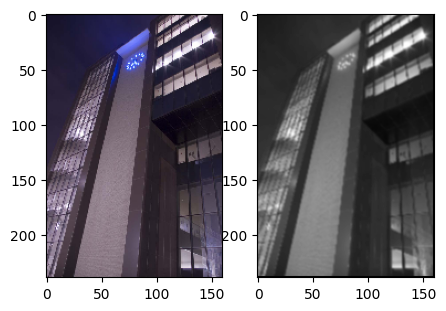

In [133]:
#display img
img = img[:, :, ::-1]  #BGR->RGB変換
plt.figure(figsize=(5, 5),dpi=100)                        #高解像度表示設定
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img))            # 元画像貼り付け
plt.gray()                                                 #グレースケール表示
plt.subplot(1, 2, 2), plt.imshow(np.uint8(img_out))        #フィルタ画像貼り付け
plt.show() 

# EX6
## 勾配強度画像の作成
### 以下のコードを完成してグレースケール画像に変換後，勾配強度画像を計算し，表示してみよう．
- グレースケール化の⽅法については前回を参照
- 画像の周囲1pixelは計算せず0を⼊れること 
- フィルタ適⽤後，値が255を超える画素には255を代⼊すること 
- 今回は画像処理プログラミング練習が⽬的なので，次のフィルタ関数 『cv2.filter2D() / cv2.GaussianBlur() / cv2.Sobel() / np.convolve() 』は利 ⽤しないこと
- 下表のソーベルフィルタのフィルタ係数(3x3)を利⽤すること
- ある画素の勾配強度は，$ I = \sqrt{f_x^2+f_y^2} $ とする．ただし，$ f_x$と$f_y$はそれぞれ横方向・縦方向のソーベルフィルタの応答とする



|    横方向フィルタ係数   |
| ---- | 

|   |   |   |
| ---- | ---- | ---- |
|  -1  |  0  | 1 |
|  -2  |  0  | 2 |
|  -1  |  0  | 1 | 

|    縦方向フィルタ係数   |
| ---- | 

|   |   |   |
| ---- | ---- | ---- |
|  -1  |  -2  | -1 |
|  0  |  0  | 0 |
|  1  |  2  | 1 | 

In [134]:
#Ex6
#勾配強度画像の作成

import numpy as np
import sys
import cv2
import math
import matplotlib.pyplot as plt

In [135]:
#入出力ファイル名指定
fname_in  = "./img_Ex1_in.jpg"

In [136]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
img = cv2.resize(img , (int(img.shape[1]*0.2), int(img.shape[0]*0.2)))
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [137]:
#出力画像を準備(float型)
img_gray = np.zeros( (H,W), float )
img_out = np.zeros( (H,W), float )


In [138]:
#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.

In [139]:
#ソーベルフィルタ処理
#ソーベルフィルタ処理
#ここを編集　
#配列h_coeffの??を修正して正しい横方向フィルタ係数を設定する
h_coeff = (
    [-1,0,1],
    [-2,0,1],
    [-1,0,1]
)
#配列v_coeffの??を修正して正しい縦方向フィルタ係数を設定する
v_coeff = (
    [-1,-2,-1],
    [0,0,0],
    [1,1,1]
)
#print(coef)

for y in range(1, H-1, 1) :#yは1～H-2
    for x in range(1, W-1, 1) :#xは1～H-2
        fx = 0.
        fy = 0.
        for iy in range(0, 3, 1) : #iyは0,1,2
            for ix in range(0, 3, 1) : #ixは0,1,2
                #ここを編集 変数fxに周辺画素とh_coeffの畳み込み演算をして格納
                fx = fx + h_coeff[iy][ix]*img_gray[y+iy-1,x+ix-1]
                #ここを編集 変数fyに周辺画素とv_coeffの畳み込み演算をして格納
                fy = fy + v_coeff[iy][ix]*img_gray[y+iy-1,x+ix-1]
                
        ans = math.sqrt(fx*fx + fy*fy)
        if ans > 255: 
            ans = 255
        img_out[y,x] = ans      

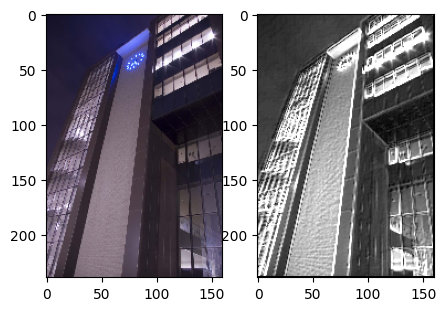

In [140]:
#display img
img = img[:, :, ::-1]  #BGR->RGB変換
plt.figure(figsize=(5, 5),dpi=100)                        #高解像度表示設定
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img))            # 元画像貼り付け
plt.gray()                                                 #グレースケール表示
plt.subplot(1, 2, 2), plt.imshow(np.uint8(img_out))        #フィルタ画像貼り付け
plt.show()     